### Task
- Download the file dataset1.xlsx located at https://docs.google.com/spreadsheets/d/10mxZ84WHzKXd7saBWE1c5PGUszXZksZx/ 
- Using Python, write the code that does the following: 
1. Reads both tables (Patients and Markers) from the downloaded file (bonus points if your code can download the file directly). 
2. From the table Markers, removes all records with the "Blood draw date" before 2019 
3. Creates a third table that is a merge of the first two (i.e. contains all the columns from both tables), by Patient ID. 
4. To the Patients table, adds a column showing how many CEA assays were taken for each patient (for example it will be 2 for EN6K, 6 for FKB8, etc). Save the table as a tab-separated file. 
5. In the Markers table, adds a column with relative date, showing the number of days from surgery to this blood draw (for example, a sample taken on 03/29/2020 for patient "CHIQ" will have a relative date of 231 days because this patient had surgery on 08/10/2020). 
6. For each patient, draws a plot showing how the levels of those markers changed over time

1. Read both tables (Patients and Markers) from the downloaded file (bonus points if your code can download the file directly)

In [9]:
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the Google Sheets file
url = "https://docs.google.com/spreadsheets/d/10mxZ84WHzKXd7saBWE1c5PGUszXZksZx/export?format=xlsx"

# Download the file
response = requests.get(url)
#output_file_path = 'dataset2.xlsx'  # Path to save the file

# Save the file to the specified path
with open('dataset1.xlsx', 'wb') as file:
    file.write(response.content)

# Read the Excel file
# excel_data = pd.ExcelFile(output_file_path)

# Extract the tables
patients_df = pd.read_excel('dataset1.xlsx', sheet_name='Patients')
markers_df = pd.read_excel('dataset1.xlsx', sheet_name='Markers')


# the df made from table contain all empty columns. To drop all columns that do not contain values in excel files:
patients_df = patients_df.dropna(axis=1, how='all')
markers_df = markers_df.dropna(axis=1, how='all')

In [10]:
#quick check of the patient dataset
patients_df.head()

,Date of Diagnosis,Patient ID,Date of surgery,Cancer Type,Cancer.Stage,earliestBloodDraw
0,2018-12-22,CHIQ,2020-08-10,Liver cancer,II,2020-09-17
1,2020-05-04,EN6K,2020-05-04,Liver cancer,I,2021-02-02
2,2018-01-22,FKB8,2019-03-01,HCC,II,2020-12-17
3,2019-09-21,GWPL,2019-12-18,Liver cancer,II,2021-06-17


In [11]:
#quick check of the marker dataset
markers_df.head()

,Marker,Blood draw date,patient_ID,Value
0,Alpha fetoprotein L3 pct,2022-03-06,CHIQ,<0.5
1,Alpha fetoprotein total,2022-03-06,CHIQ,2
2,CA 19-9,2022-03-06,CHIQ,6
3,Des-gamma-carboxy prothrombin,2022-03-06,CHIQ,0.5
4,Alpha fetoprotein,2022-02-14,GWPL,2.7


In [12]:
#check patient dataset dimension
patients_df.shape

(4, 6)

In [13]:
#check marker dataset dimention
markers_df.shape

(119, 4)

2. From the table Markers, removes all records with the "Blood draw date" before 2019 

In [14]:
markers_df.dtypes

Marker                     object
Blood draw date    datetime64[ns]
patient_ID                 object
Value                      object
dtype: object

In [15]:
# Because 'Blood draw date' is in datetime format, translate before 2019 as before 2019-1-1, use the same datetime format for comparison
markers_df_new = markers_df[markers_df["Blood draw date"] >= datetime(2019,1,1)]
markers_df_new.shape #only one entry is before 2019

(118, 4)

In [16]:
#confirm the one entry that is before 2019
markers_df.tail() 

,Marker,Blood draw date,patient_ID,Value
114,Alpha fetoprotein total,2019-05-31,FKB8,3
115,CEA,2019-05-31,FKB8,2.5
116,Alpha fetoprotein,2019-02-23,GWPL,3.7
117,Alpha fetoprotein,2019-01-13,FKB8,10.1 (H)
118,Alpha fetoprotein,2018-09-22,FKB8,11.9 (H)


3. Creates a third table that is a merge of the first two (i.e. contains all the columns from both tables), by Patient ID. 

In [17]:
#the common shared column in both datasets is patient ID, however the header for the column is differently labeled, needs to use left_on and right_on to merge
merged_df = pd.merge(patients_df, markers_df, left_on="Patient ID", right_on='patient_ID')
merged_df.head()

,Date of Diagnosis,Patient ID,Date of surgery,Cancer Type,Cancer.Stage,earliestBloodDraw,Marker,Blood draw date,patient_ID,Value
0,2018-12-22,CHIQ,2020-08-10,Liver cancer,II,2020-09-17,Alpha fetoprotein L3 pct,2022-03-06,CHIQ,<0.5
1,2018-12-22,CHIQ,2020-08-10,Liver cancer,II,2020-09-17,Alpha fetoprotein total,2022-03-06,CHIQ,2
2,2018-12-22,CHIQ,2020-08-10,Liver cancer,II,2020-09-17,CA 19-9,2022-03-06,CHIQ,6
3,2018-12-22,CHIQ,2020-08-10,Liver cancer,II,2020-09-17,Des-gamma-carboxy prothrombin,2022-03-06,CHIQ,0.5
4,2018-12-22,CHIQ,2020-08-10,Liver cancer,II,2020-09-17,Alpha fetoprotein L3 pct,2021-10-24,CHIQ,<0.5


4. To the Patients table, adds a column showing how many CEA assays were taken for each patient (for example it will be 2 for EN6K, 6 for FKB8, etc). Save the table as a tab-separated file. 

In [18]:
patients_df.head()

,Date of Diagnosis,Patient ID,Date of surgery,Cancer Type,Cancer.Stage,earliestBloodDraw
0,2018-12-22,CHIQ,2020-08-10,Liver cancer,II,2020-09-17
1,2020-05-04,EN6K,2020-05-04,Liver cancer,I,2021-02-02
2,2018-01-22,FKB8,2019-03-01,HCC,II,2020-12-17
3,2019-09-21,GWPL,2019-12-18,Liver cancer,II,2021-06-17


In [19]:
# to count CEA marker for each patient, use patient ID and CEA as two conditions to select dataset and simply count the rows of the dataset use .shape[0]
patient_id = ['CHIQ', 'EN6K', 'FKB8', 'GWPL']
CEA_count=[] # as a list in the same order of Patient ID in markers_df
for p_id in patient_id:
    count = merged_df[(merged_df["Patient ID"]==p_id) & (merged_df['Marker']=='CEA')].shape[0]
    CEA_count.append(count)

CEA_count

[2, 1, 6, 4]

In [20]:
# add the CEA count column using insert function with the location, header and value info.
patients_df.insert(6, "CEA_Count", CEA_count)
patients_df

,Date of Diagnosis,Patient ID,Date of surgery,Cancer Type,Cancer.Stage,earliestBloodDraw,CEA_Count
0,2018-12-22,CHIQ,2020-08-10,Liver cancer,II,2020-09-17,2
1,2020-05-04,EN6K,2020-05-04,Liver cancer,I,2021-02-02,1
2,2018-01-22,FKB8,2019-03-01,HCC,II,2020-12-17,6
3,2019-09-21,GWPL,2019-12-18,Liver cancer,II,2021-06-17,4


5. In the Markers table, adds a column with relative date, showing the number of days from surgery to this blood draw (for example, a sample taken on 03/29/2020 for patient "CHIQ" will have a relative date of 231 days because this patient had surgery on 08/10/2020). 

In [21]:
markers_df.head()

,Marker,Blood draw date,patient_ID,Value
0,Alpha fetoprotein L3 pct,2022-03-06,CHIQ,<0.5
1,Alpha fetoprotein total,2022-03-06,CHIQ,2
2,CA 19-9,2022-03-06,CHIQ,6
3,Des-gamma-carboxy prothrombin,2022-03-06,CHIQ,0.5
4,Alpha fetoprotein,2022-02-14,GWPL,2.7


In [22]:
# add a colume of Date_of_Surgery for each patient, sustract Blood draw date from the Surgery date to obtain the days between the two
# use map function to add Date_of_Surgery
surgery_date_code={'CHIQ':'2020-08-10', 'EN6K':'2020-05-04', 'FKB8':'2019-03-01', 'GWPL':'2019-12-28'}
markers_df['Date_of_Surgery'] = markers_df['patient_ID'].map(surgery_date_code)

markers_df.head()

,Marker,Blood draw date,patient_ID,Value,Date_of_Surgery
0,Alpha fetoprotein L3 pct,2022-03-06,CHIQ,<0.5,2020-08-10
1,Alpha fetoprotein total,2022-03-06,CHIQ,2,2020-08-10
2,CA 19-9,2022-03-06,CHIQ,6,2020-08-10
3,Des-gamma-carboxy prothrombin,2022-03-06,CHIQ,0.5,2020-08-10
4,Alpha fetoprotein,2022-02-14,GWPL,2.7,2019-12-28


In [23]:
markers_df.dtypes

Marker                     object
Blood draw date    datetime64[ns]
patient_ID                 object
Value                      object
Date_of_Surgery            object
dtype: object

In [24]:
# change Date_of_Surgery to datatime format 
markers_df['Date_of_Surgery']=pd.to_datetime(markers_df['Date_of_Surgery'], format='%Y/%m/%d')

In [25]:
markers_df.dtypes

Marker                     object
Blood draw date    datetime64[ns]
patient_ID                 object
Value                      object
Date_of_Surgery    datetime64[ns]
dtype: object

In [26]:
# subtract the two dates and convert the difference in the format of days
markers_df['Relative_days_from_surgery'] = (markers_df["Blood draw date"] - markers_df["Date_of_Surgery"]).dt.days

markers_df.head()

,Marker,Blood draw date,patient_ID,Value,Date_of_Surgery,Relative_days_from_surgery
0,Alpha fetoprotein L3 pct,2022-03-06,CHIQ,<0.5,2020-08-10,573
1,Alpha fetoprotein total,2022-03-06,CHIQ,2,2020-08-10,573
2,CA 19-9,2022-03-06,CHIQ,6,2020-08-10,573
3,Des-gamma-carboxy prothrombin,2022-03-06,CHIQ,0.5,2020-08-10,573
4,Alpha fetoprotein,2022-02-14,GWPL,2.7,2019-12-28,779


6. For each patient, draws a plot showing how the levels of those markers changed over time

In [27]:
# the plotting, the datatype in 'Value' needs to be float
# check unusual format in 'Value' for cleaning data
l1 = markers_df['Value'].to_list()
l1

['<0.5',
 2,
 6,
 0.5,
 2.7,
 1.5,
 '71 (H)',
 3.3,
 '<0.01',
 '<0.5',
 1,
 0.3,
 1.9,
 '<0.5',
 1,
 '78 (H)',
 '<0.5',
 2,
 12,
 0.5,
 '1,122.0 (H)',
 '<0.5',
 1,
 '106 (H)',
 2,
 '<0.5',
 2,
 14,
 '<1.2',
 '403.1 (H)',
 '<0.5',
 1,
 0.2,
 1.1,
 '<0.5',
 1,
 '88 (H)',
 '113.8 (H)',
 2.5,
 '<0.5',
 1,
 '99 (H)',
 '<0.5',
 2,
 12,
 '18.0 (H)',
 '<0.5',
 2,
 29,
 '11.3 (H)',
 1.4,
 '120 (H)',
 2.6,
 1.4,
 '124 (H)',
 1.3,
 '<0.5',
 1,
 12,
 '<0.5',
 1,
 '102 (H)',
 5.6,
 2.2,
 21,
 3,
 1.9,
 2.8,
 12,
 '<1.2',
 4.6,
 2.2,
 6,
 4,
 7.6,
 '5.1 (H)',
 1.9,
 5.7,
 4,
 3.6,
 5.8,
 1.8,
 11,
 '<1.2',
 4.2,
 2,
 4,
 6.5,
 15,
 1.9,
 4.7,
 3,
 3.5,
 2.2,
 1.8,
 3.9,
 2.2,
 2.1,
 4.8,
 3,
 '3.9 (H)',
 2.3,
 1.1,
 4.7,
 3,
 3,
 3,
 3.7,
 2.1,
 '690 (H)',
 20,
 3.1,
 5.3,
 '<0.5',
 3,
 2.5,
 3.7,
 '10.1 (H)',
 '11.9 (H)']

In [28]:
# Issues in 'Value' that need to be fixed: 
#   1. values with "<": replace with value "0"
#   2. values with " (H)": remove " (H)"
#   3. values with "," when over thousands: remove ","
# use df.replace function with regex 

markers_df1 = markers_df.replace(to_replace=r'<.*', value=0, regex=True)
markers_df2 = markers_df1.replace(to_replace=r' \(H\)', value='', regex=True)
markers_df3 = markers_df2.replace(to_replace=r',', value='', regex=True)

In [29]:
# convert to float type
markers_df3['Value'] = markers_df3['Value'].astype(float)

In [30]:
markers_df3.dtypes

Marker                                object
Blood draw date               datetime64[ns]
patient_ID                            object
Value                                float64
Date_of_Surgery               datetime64[ns]
Relative_days_from_surgery             int64
dtype: object

In [31]:
markers_df3.head()

,Marker,Blood draw date,patient_ID,Value,Date_of_Surgery,Relative_days_from_surgery
0,Alpha fetoprotein L3 pct,2022-03-06,CHIQ,0.0,2020-08-10,573
1,Alpha fetoprotein total,2022-03-06,CHIQ,2.0,2020-08-10,573
2,CA 19-9,2022-03-06,CHIQ,6.0,2020-08-10,573
3,Des-gamma-carboxy prothrombin,2022-03-06,CHIQ,0.5,2020-08-10,573
4,Alpha fetoprotein,2022-02-14,GWPL,2.7,2019-12-28,779


6. For each patient, draws a plot showing how the levels of those markers changed over time

In [32]:
# testing the method using one patient ID
markers_CHIQ = markers_df3[markers_df3['patient_ID']=='CHIQ']
markers_CHIQ

,Marker,Blood draw date,patient_ID,Value,Date_of_Surgery,Relative_days_from_surgery
0,Alpha fetoprotein L3 pct,2022-03-06,CHIQ,0.0,2020-08-10,573
1,Alpha fetoprotein total,2022-03-06,CHIQ,2.0,2020-08-10,573
2,CA 19-9,2022-03-06,CHIQ,6.0,2020-08-10,573
3,Des-gamma-carboxy prothrombin,2022-03-06,CHIQ,0.5,2020-08-10,573
16,Alpha fetoprotein L3 pct,2021-10-24,CHIQ,0.0,2020-08-10,440
17,Alpha fetoprotein total,2021-10-24,CHIQ,2.0,2020-08-10,440
18,CA 19-9,2021-10-24,CHIQ,12.0,2020-08-10,440
19,Des-gamma-carboxy prothrombin,2021-10-24,CHIQ,0.5,2020-08-10,440
24,Alpha fetoprotein,2021-08-03,CHIQ,2.0,2020-08-10,358
25,Alpha fetoprotein L3 pct,2021-08-03,CHIQ,0.0,2020-08-10,358


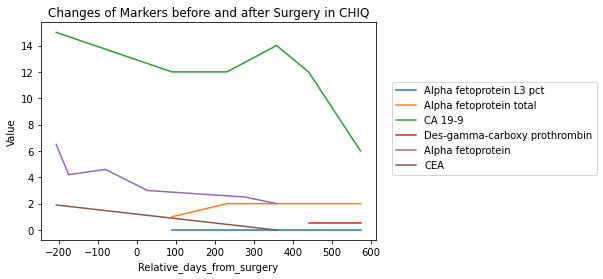

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=markers_CHIQ, x='Relative_days_from_surgery', y='Value', hue='Marker')
plt.title('Changes of Markers before and after Surgery in CHIQ')
plt.legend(loc=[1.05, 0.3])
plt.show()

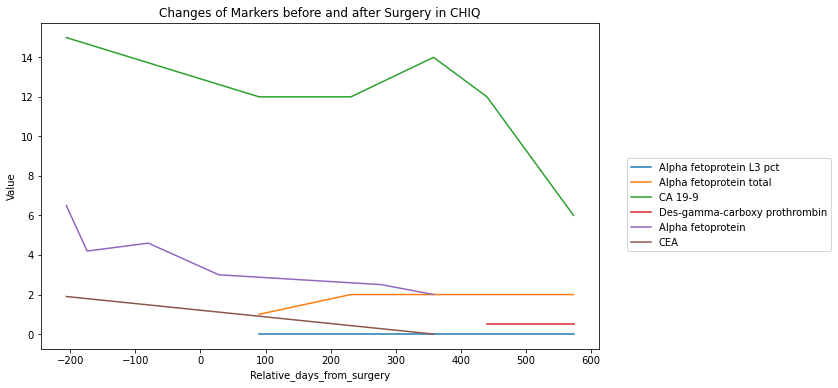

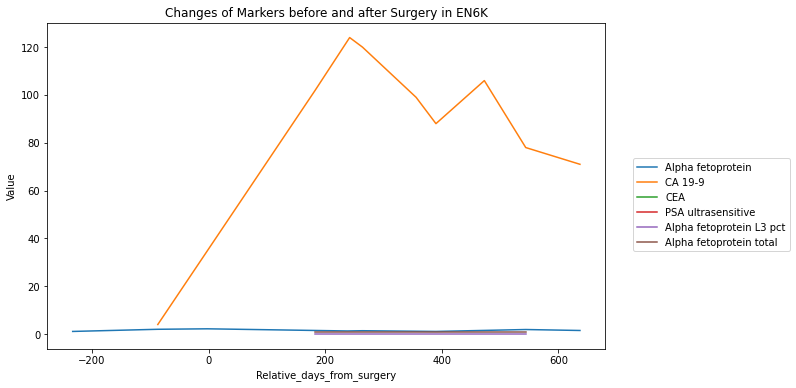

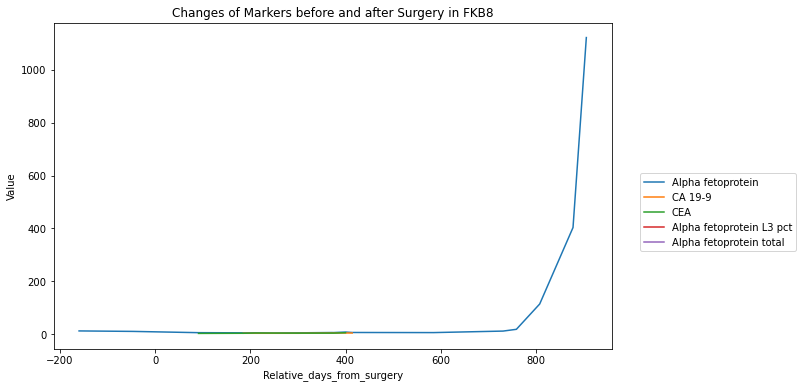

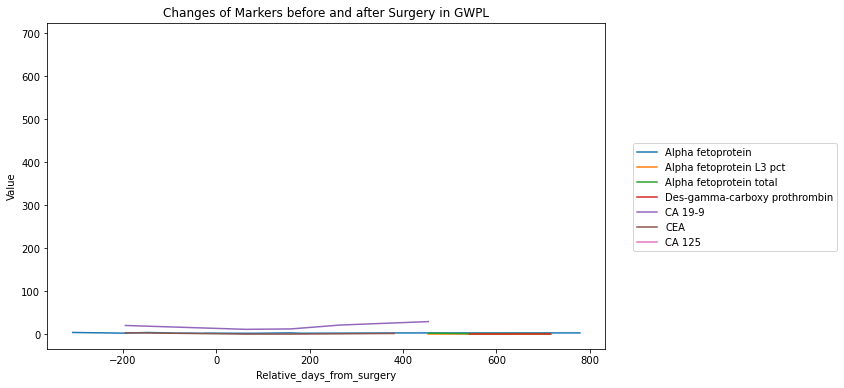

In [34]:
# Plot each separately using a loop

patient_id = ['CHIQ', 'EN6K', 'FKB8', 'GWPL']

for f_loc, p_id in enumerate(patient_id):
    # Create a single plot for each patient ID
    plt.figure(figsize=(10, 6))
    id_df = markers_df3[markers_df3['patient_ID'] == p_id]
    sns.lineplot(data=id_df, x='Relative_days_from_surgery', y='Value', hue='Marker')
    plt.title(f'Changes of Markers before and after Surgery in {p_id}')
    plt.legend(loc=[1.05, 0.3])
    plt.show()


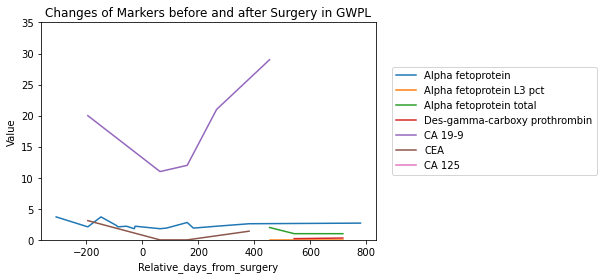

In [35]:
# Remove the single high point data to view the rest of the graph better for GWPL
markers_GWPL = markers_df3[markers_df3['patient_ID']=='GWPL']
sns.lineplot(data=markers_GWPL, x='Relative_days_from_surgery', y='Value', hue='Marker', markers=True)
plt.title('Changes of Markers before and after Surgery in GWPL')
plt.ylim(0, 35)
plt.legend(loc=[1.05, 0.3])
plt.show()

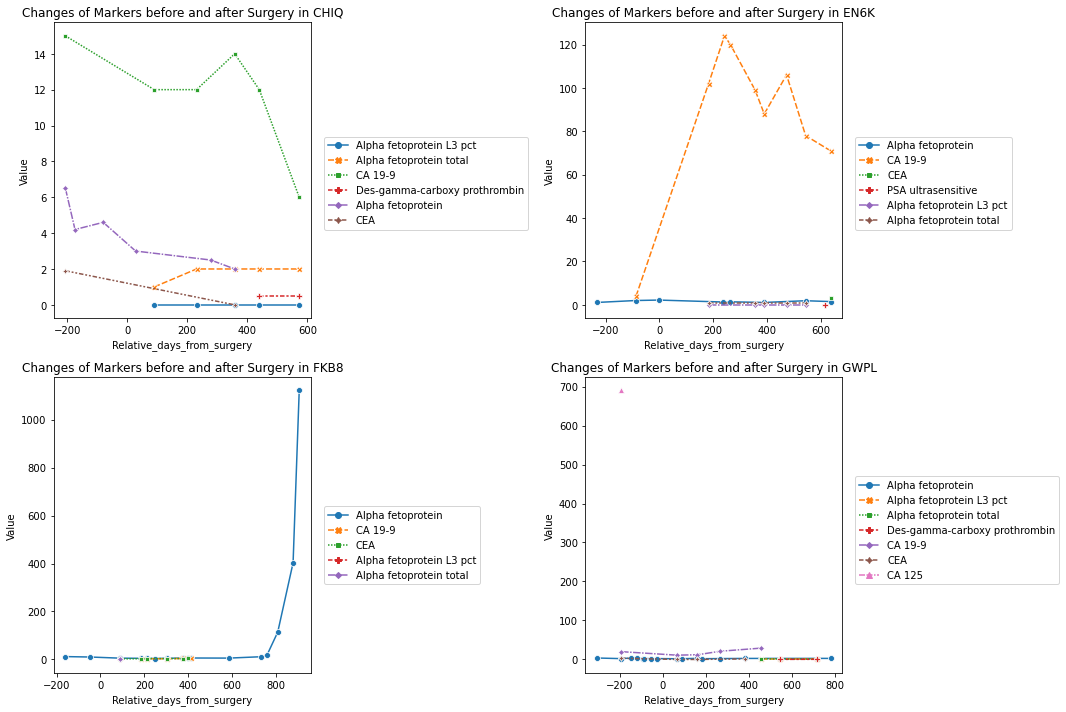

In [37]:
# plot all plots in one figure, and indicate the data point with symbols
patient_id = ['CHIQ', 'EN6K', 'FKB8', 'GWPL']

fig, axs = plt.subplots(2, 2, figsize=(15, 10)) # fig layout 2x2
axs = axs.flatten() #required

for f_loc, p_id in enumerate(patient_id):

    id_df = markers_df3[markers_df3['patient_ID']==p_id]
    sns.lineplot(data=id_df, x='Relative_days_from_surgery', y='Value', hue='Marker', style='Marker', markers=True, ax=axs[f_loc])
    axs[f_loc].set_title(f'Changes of Markers before and after Surgery in {p_id}')
    axs[f_loc].legend(loc=[1.05, 0.3])

plt.tight_layout()
plt.show()
